<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/hw_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# ***嘗試一（相對於老師教學的程式碼）***
1.   改變embedding層：詞彙量為10000、32維向量空間、每次輸入100個單詞
2.   改變LSTM神經元數目（從128變成50，且沒有droupout）
3.   增加validation set






**讀入數據**

In [3]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


**檢視資料**

In [4]:
print('Maximum review length: {}'.format(
len(max((x_train + x_test), key=len))))

Maximum review length: 2697


In [5]:
print('Minimum review length: {}'.format(
len(min((x_test + x_test), key=len))))

Minimum review length: 14


In [0]:
x_train=sequence.pad_sequences(x_train,maxlen=100)
x_test=sequence.pad_sequences(x_test,maxlen=100)

**打造函數學習機**

In [0]:
model=Sequential()

In [0]:
model.add(Embedding(10000,32,input_length=100))

In [0]:
model.add(LSTM(50))

In [0]:
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 336,651
Trainable params: 336,651
Non-trainable params: 0
_________________________________________________________________


In [0]:
batch_size=64
epochs=3
x_valid, y_valid = x_train[:batch_size], y_train[:batch_size]
x_train2, y_train2 = x_train[batch_size:], y_train[batch_size:]

In [14]:
response=model.fit(x_train2,y_train2,batch_size=64,epochs=3,validation_data=(x_valid,y_valid))

Epoch 1/3
390/390 [==============================] - 25s 65ms/step - loss: 0.4332 - accuracy: 0.7891 - val_loss: 0.2421 - val_accuracy: 0.8750
Epoch 2/3
390/390 [==============================] - 26s 67ms/step - loss: 0.2650 - accuracy: 0.8937 - val_loss: 0.2500 - val_accuracy: 0.8594
Epoch 3/3
390/390 [==============================] - 26s 66ms/step - loss: 0.2087 - accuracy: 0.9208 - val_loss: 0.2677 - val_accuracy: 0.8906


In [0]:
model_json=model.to_json()
open('imdb_model_architecture.json','w').write(model_json)
model.save_weights('imdb_model_weights.h5')

In [16]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.8405600190162659


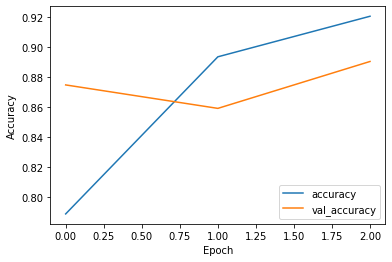

In [17]:
plt.plot(response.history['accuracy'], label='accuracy')
plt.plot(response.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

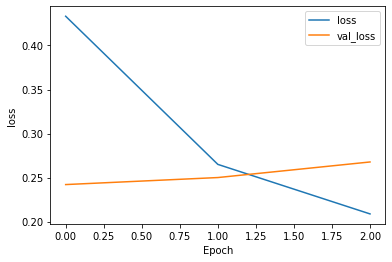

In [18]:
plt.plot(response.history['loss'], label='loss')
plt.plot(response.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

# **結果**
## **training accuracy:92%**
## **val accuracy:89%**
## **testing accuracy:84%**
## 相較於先前上課程式碼所產生的模型，本次模型應有overfitting的狀況




# ***嘗試二***
1.   將原本的LSTM層變成雙向LSTM，並為了提取句子中的強特徵，新增一層GobalMaxPool()
2.   新增一層Desne（activation function為relu）
3.   增加Dropout層（減少overfitting的可能）



In [19]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [0]:
model2 = Sequential()
model2.add(Embedding(10000, 32,input_length=100))
model2.add(Bidirectional(LSTM(50, return_sequences = True)))
model2.add(GlobalMaxPool1D())
model2.add(Dense(30, activation="relu"))
model2.add(Dropout(0.05))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          33200     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 356,261
Trainable params: 356,261
Non-trainable params: 0
________________________________________________

In [22]:
response2=model2.fit(x_train2,y_train2,batch_size=64,epochs=3,validation_data=(x_valid,y_valid))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 53s 2ms/step - loss: 0.4578 - accuracy: 0.7705 - val_loss: 0.2105 - val_accuracy: 0.9062
Epoch 2/3
24936/24936 [==============================] - 53s 2ms/step - loss: 0.2720 - accuracy: 0.8906 - val_loss: 0.2310 - val_accuracy: 0.8750
Epoch 3/3
24936/24936 [==============================] - 53s 2ms/step - loss: 0.2103 - accuracy: 0.9194 - val_loss: 0.2313 - val_accuracy: 0.9219


In [24]:
scores2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores2[1])

Test accuracy: 0.8441200256347656


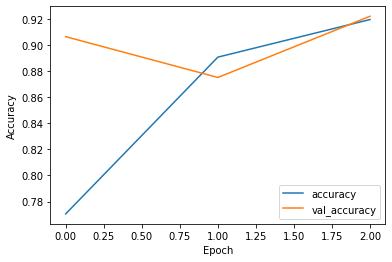

In [25]:
plt.plot(response2.history['accuracy'], label='accuracy')
plt.plot(response2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

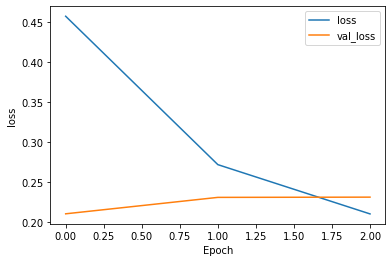

In [26]:
plt.plot(response2.history['loss'], label='loss')
plt.plot(response2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

# **結果**
## **training accuracy:92%**
## **val accuracy:92%**
## **testing accuracy:84%**
## 相較於模型一，train跟val的正確率差異降低，但是將模型是用到testing 資料時，模型一跟模型二皆只能有84%正確率

# **嘗試三**
1.   參考嘗試二的程式，並將LSTM換成GRU，看兩種不同模型有何差異

In [0]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [0]:
model3 = Sequential()
model3.add(Embedding(10000, 32,input_length=100))
model3.add(Bidirectional(GRU(50, return_sequences = True)))
model3.add(GlobalMaxPool1D())
model3.add(Dense(30, activation="relu"))
model3.add(Dropout(0.05))
model3.add(Dense(1, activation="sigmoid"))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100, 100)          24900     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 347,961
Trainable params: 347,961
Non-trainable params: 0
________________________________________________

In [30]:
response3=model3.fit(x_train2,y_train2,batch_size=64,epochs=3,validation_data=(x_valid,y_valid))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 64s 3ms/step - loss: 0.4527 - accuracy: 0.7745 - val_loss: 0.2638 - val_accuracy: 0.9062
Epoch 2/3
24936/24936 [==============================] - 63s 3ms/step - loss: 0.2658 - accuracy: 0.8930 - val_loss: 0.2419 - val_accuracy: 0.8594
Epoch 3/3
24936/24936 [==============================] - 63s 3ms/step - loss: 0.1964 - accuracy: 0.9262 - val_loss: 0.2734 - val_accuracy: 0.8594


In [31]:
scores3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', scores3[1])

Test accuracy: 0.8449599742889404


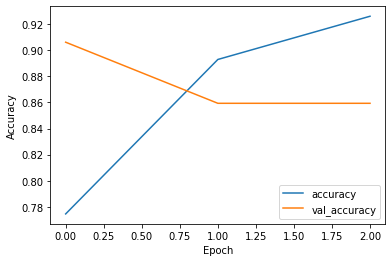

In [32]:
plt.plot(response3.history['accuracy'], label='accuracy')
plt.plot(response3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

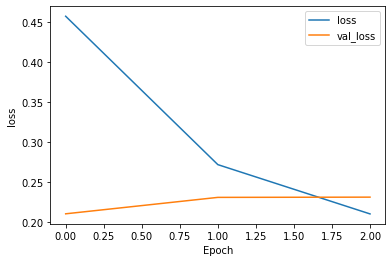

In [33]:
plt.plot(response2.history['loss'], label='loss')
plt.plot(response2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

# **結果**
## **training accuracy:93%**
## **val accuracy:86%**
## **testing accuracy:84%**
## 相較於模型二，模型三不僅要花較長的訓練時間，val的正確率也低很多，testing 資料正確率則無較好的正確率。因此，本次作業中，模型二應為較好的模型